# Profit Optimization By Product Mix

In this algorithm rather than producing a single type of bar, we are all three types (i.e. a combination of three types). This process can also be automated in actual bar mill by improvising and updating software controls. These software controls will control number of passes, diameters and also governs the cutting time and length. This simulation only shows how a mixed mode production results in near zero scrap.

In [22]:
#maximum length possible
billet_length = 12   #in meters 11.9 tested 
total_volume = 0.15*0.15*billet_length
ten_mm_v = 0.000942
twelve_mm_v = 0.001356
sixteen_mm_v = 0.002411
q16= int(total_volume/sixteen_mm_v)
q12= int(total_volume/twelve_mm_v)
q10= int(total_volume/ten_mm_v)
print("Maximum Quantities Possible")
print(q16,q12,q10)
scrap_v = 99999 
loss =[]

Maximum Quantities Possible
111 199 286


# Measuring Losses (Single Unit Production) 

In [23]:
q10_loss = total_volume- (q10*0.000942)
q12_loss = total_volume - (q12*0.001356)
q16_loss = total_volume - (q16*0.002411)
loss.append(q10_loss)
loss.append(q12_loss)
loss.append(q16_loss)
print(q10_loss,q12_loss,q16_loss)

0.0005880000000000329 0.000156000000000045 0.00237900000000002


# Measuring Losses (Mixed Mode)

In [24]:
count=0
scrap_array=[]
dimensions=[]
for i in range(0,q16+1):
    for j in range(0,q12+1):
        curr_v_1 = i*sixteen_mm_v+ j*twelve_mm_v
        if(curr_v_1>total_volume):
            break
        for k in range(0,q10+1):
            curr_v_2 = i*sixteen_mm_v + j*twelve_mm_v + k*ten_mm_v
            if(curr_v_2>total_volume):
                break
            remaining_v= total_volume-curr_v_2
            
            count = count + 1
            if(remaining_v<=scrap_v):
                scrap_array.append(remaining_v)
                l=[]
                l.append(i)
                l.append(j)
                l.append(k)
                dimensions.append(l)
                scrap_v = remaining_v

loss.append(scrap_v)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7], [0, 0, 8], [0, 0, 9], [0, 0, 10], [0, 0, 11], [0, 0, 12], [0, 0, 13], [0, 0, 14], [0, 0, 15], [0, 0, 16], [0, 0, 17], [0, 0, 18], [0, 0, 19], [0, 0, 20], [0, 0, 21], [0, 0, 22], [0, 0, 23], [0, 0, 24], [0, 0, 25], [0, 0, 26], [0, 0, 27], [0, 0, 28], [0, 0, 29], [0, 0, 30], [0, 0, 31], [0, 0, 32], [0, 0, 33], [0, 0, 34], [0, 0, 35], [0, 0, 36], [0, 0, 37], [0, 0, 38], [0, 0, 39], [0, 0, 40], [0, 0, 41], [0, 0, 42], [0, 0, 43], [0, 0, 44], [0, 0, 45], [0, 0, 46], [0, 0, 47], [0, 0, 48], [0, 0, 49], [0, 0, 50], [0, 0, 51], [0, 0, 52], [0, 0, 53], [0, 0, 54], [0, 0, 55], [0, 0, 56], [0, 0, 57], [0, 0, 58], [0, 0, 59], [0, 0, 60], [0, 0, 61], [0, 0, 62], [0, 0, 63], [0, 0, 64], [0, 0, 65], [0, 0, 66], [0, 0, 67], [0, 0, 68], [0, 0, 69], [0, 0, 70], [0, 0, 71], [0, 0, 72], [0, 0, 73], [0, 0, 74], [0, 0, 75], [0, 0, 76], [0, 0, 77], [0, 0, 78], [0, 0, 79], [0, 0, 80], [0, 0, 81], [0, 0, 82], [0, 0, 83], [

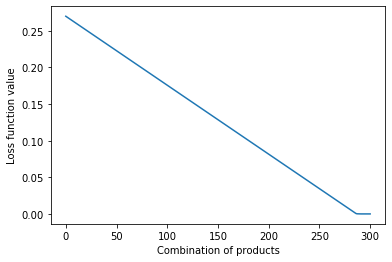

In [29]:
#Graph for loss
print(dimensions)
from matplotlib import pyplot as plt
plt.plot(scrap_array)
plt.xlabel("Combination of products")
plt.ylabel("Loss function value")
plt.show()

# Comparative Loss

[0.0005880000000000329, 0.000156000000000045, 0.00237900000000002, 0.0]


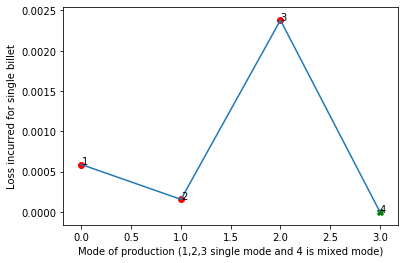

In [28]:
print(loss)
plt.plot(loss)
plt.xlabel("Mode of production (1,2,3 single mode and 4 is mixed mode)")
plt.ylabel("Loss incurred for single billet")
plt.scatter(0,loss[0],color="red",marker='o')
plt.scatter(1,loss[1],color="red",marker='o')
plt.scatter(2,loss[2],color="red",marker='o')
plt.scatter(3,loss[3],color="green",marker='X')
plt.annotate('1',(0, loss[0]))
plt.annotate('2',(1, loss[1]))
plt.annotate('3',(2, loss[2]))
plt.annotate('4',(3, loss[3]))
       
plt.show()

# Quantifying Results

In [20]:
#--------Results-----------------
avg_loss_single_mode_single_billet = (sum(loss)-loss[3])/3
print("For a single Billet We gain = ",avg_loss_single_mode_single_billet,"cubic meter")
print("Assume we are charging 500 billets everyday for 200 days in year")
year_gain= 500*200*avg_loss_single_mode_single_billet
print("Year End Gain = ",year_gain,"cubic meter")
print("This gain is equivalent to ? ")
print(year_gain/ten_mm_v,"Nos. of 12m 10mm bars \n",year_gain/twelve_mm_v,"Nos. of 12m 12mm bars\n",year_gain/sixteen_mm_v,"Nos. of 12m 16mm bars")



For a single Billet We gain =  0.0010410000000000326 cubic meter
Assume we are charging 500 billets everyday for 200 days in year
Year End Gain =  104.10000000000326 cubic meter
This gain is equivalent to ? 
110509.55414013084 Nos. of 12m 10mm bars 
 76769.91150442719 Nos. of 12m 12mm bars
 43177.104935712676 Nos. of 12m 16mm bars
